In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.6MB/s 
     |████████████████████████████████| 9.5MB 32.3MB/s 
     |████████████████████████████████| 2.1MB 34.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import files
from PIL import Image
uploaded = files.upload()

Saving 1Febrero.jpg to 1Febrero.jpg


####Lectura de datos

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Falken777/casos_confirmados_global/main/time_series_covid19_confirmed_global2.csv")
print("Tamaño del df", data.shape)
data.head()

Tamaño del df (273, 378)


,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,...,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,50013,50190,50433,50655,50810,50886,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53425,53814,54317,54827,55380,55755,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,95659,96069,96549,97007,97441,97857,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7602,7633,7669,7699,7756,7806,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16686,16802,16931,17029,17099,17149,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723


In [ ]:
data.drop(columns=["Province/State"], inplace=True)

In [ ]:
data.isnull().sum()

Country/Region    0
Lat               1
Long              1
2020-01-22        0
2020-01-23        0
                 ..
2021-01-25        0
2021-01-26        0
2021-01-27        0
2021-01-28        0
2021-01-29        0
Length: 377, dtype: int64

####Hacemos limpieza de datos

In [ ]:
data = data.dropna()
print("Tamaño del data nuevo: ", data.shape)
data.head()

Tamaño del data nuevo:  (272, 377)


,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,...,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,50013,50190,50433,50655,50810,50886,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53425,53814,54317,54827,55380,55755,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,95659,96069,96549,97007,97441,97857,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7602,7633,7669,7699,7756,7806,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16686,16802,16931,17029,17099,17149,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723


In [ ]:
data.drop(["Lat", "Long"], inplace=True, axis=1)
data.rename(columns={"Country/Region":"Bolivia"}, inplace=True)
data.head()

,Bolivia,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,50013,50190,50433,50655,50810,50886,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53425,53814,54317,54827,55380,55755,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,95659,96069,96549,97007,97441,97857,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7602,7633,7669,7699,7756,7806,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16686,16802,16931,17029,17099,17149,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723


In [ ]:
df_basura = data[data.Bolivia != "Bolivia"]
print(df_basura[0:30])
print(df_basura.shape)

                   Bolivia  2020-01-22  ...  2021-01-28  2021-01-29
0              Afghanistan           0  ...       54891       54939
1                  Albania           0  ...       75454       76350
2                  Algeria           0  ...      106610      106887
3                  Andorra           0  ...        9779        9837
4                   Angola           0  ...       19672       19723
5      Antigua and Barbuda           0  ...         215         218
6                Argentina           0  ...     1905524     1915362
7                  Armenia           0  ...      166669      166728
8                Australia           0  ...         118         118
9                Australia           0  ...        5099        5101
10               Australia           0  ...          98          98
11               Australia           0  ...        1308        1309
12               Australia           0  ...         596         596
13               Australia           0  ...     

In [ ]:
paises_rep = data.Bolivia.duplicated().sum()
print("Países repetidos :", paises_rep)

Países repetidos : 80


In [ ]:
data.drop_duplicates(subset=["Bolivia"], inplace=True)
paises_rep = data.Bolivia.duplicated().sum()
print("Países repetidos :", paises_rep)

Países repetidos : 0


In [ ]:
data.set_index("Bolivia", inplace=True)
data.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29
Bolivia,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,50013,50190,50433,50655,50810,50886,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53425,53814,54317,54827,55380,55755,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,95659,96069,96549,97007,97441,97857,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7602,7633,7669,7699,7756,7806,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16686,16802,16931,17029,17099,17149,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723


In [ ]:
fechas_rep = data.columns.duplicated().sum()
print("Fechas repetidas: ", fechas_rep)

Fechas repetidas:  0


In [ ]:
for i in data.index:
  if i!="Bolivia":
    data.drop(i, inplace=True, axis=0)
    print(i)
data.head()

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marsh

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29
Bolivia,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bolivia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,150385,151059,152064,153121,153590,154349,154843,155594,156887,158372,160124,160985,162055,162661,163671,165268,166981,168891,171154,172798,173896,175288,176761,178818,181016,183589,185680,187183,188733,191090,193745,196393,198257,199989,201037,202818,205208,208074,210726,213392


In [ ]:
data.rename({"Bolivia":"Positivos"}, inplace=True, axis=0)
data.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29
Bolivia,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Positivos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,150385,151059,152064,153121,153590,154349,154843,155594,156887,158372,160124,160985,162055,162661,163671,165268,166981,168891,171154,172798,173896,175288,176761,178818,181016,183589,185680,187183,188733,191090,193745,196393,198257,199989,201037,202818,205208,208074,210726,213392


####Cambiamos el dataset

In [ ]:
copia = data.iloc[0]
copia.head()

2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Positivos, dtype: int64

In [ ]:
df = pd.DataFrame(data=copia)
df.head()

,Positivos
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [ ]:
df.reset_index(inplace=True)
df.head()

,index,Positivos
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [ ]:
df.drop(range(0,150), inplace=True, axis=0)
df.rename(columns={"index":"FechaPositivos"}, inplace=True)
df.head()

,FechaPositivos,Positivos
150,2020-06-20,23512
151,2020-06-21,24388
152,2020-06-22,25493
153,2020-06-23,26389
154,2020-06-24,27487


In [ ]:
df["FechaPositivos"] = pd.to_datetime(df["FechaPositivos"])
df.set_index("FechaPositivos", inplace=True)
df.head()

,Positivos
FechaPositivos,
2020-06-20,23512
2020-06-21,24388
2020-06-22,25493
2020-06-23,26389
2020-06-24,27487


In [ ]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

####Visualizamos los datos

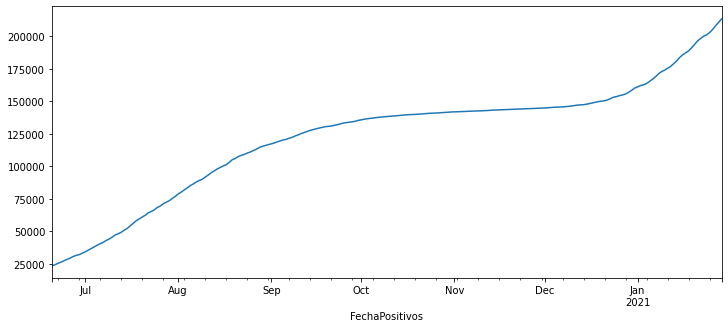

In [ ]:
df["Positivos"].plot(figsize=(12,5))

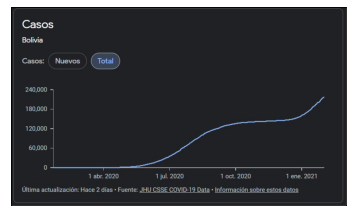

In [ ]:
casosReales = Image.open("DatosReales.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(casosReales)


####Verificamos estacionaridad

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag="AIC")
  print("1. ADF: ", dftest[0])
  print("2. P-Value: ", dftest[1])
  print("3. Num Lags: ", dftest[2])
  print("4. Num observaciones para regresión y valores críticos :", dftest[3])
  print("5. Valores críticos: ")
  for key, val in dftest[4].items():
    print("\t", key, ": ", val)

In [ ]:
ad_test(df["Positivos"])

1. ADF:  0.8947891726004895
2. P-Value:  0.9930219454368946
3. Num Lags:  15
4. Num observaciones para regresión y valores críticos : 208
5. Valores críticos: 
	 1% :  -3.4621857592784546
	 5% :  -2.875537986778846
	 10% :  -2.574231080806213


####Averiguamos el orden para el modelo

In [ ]:
from pmdarima import auto_arima
#Ignorando las advertencias inofencivas
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df["Positivos"], trace= True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=3107.926, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3154.012, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3144.307, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3141.473, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3125.341, Time=0.26 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=3124.967, Time=0.18 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=3085.119, Time=0.37 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=3108.396, Time=0.19 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=3079.382, Time=0.51 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=3093.255, Time=0.22 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=3080.105, Time=0.68 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=inf, Time=0.86 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=3076.803, Time=0.61 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=3075.175, Time=0.47 sec
 ARIMA(1,2,3)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  224
Model:               SARIMAX(2, 2, 3)   Log Likelihood               -1531.587
Date:                Wed, 03 Feb 2021   AIC                           3075.175
Time:                        21:12:43   BIC                           3095.591
Sample:                             0   HQIC                          3083.417
                                - 224                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2160      0.026     47.269      0.000       1.166       1.266
ar.L2         -0.9718      0.020    -49.737      0.000      -1.010      -0.934
ma.L1         -1.7012      0.058    -29.584      0.000      -1.814      -1.588
ma.L2          1.5152      0.084     18.101      0.000       1.351       1.679
ma.L3         -0.5276      0.056     -9.419      0.000      -0.637      -0.418
sigma2       5.44e+04   4124.304     13.191      0.000    4.63e+04    6.25e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                11.25
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             0.03
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

####Importamos el modelo

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

####Hacemos Holdout

In [ ]:
print("Sin holdout: ", df.shape)
train = df.iloc[:-14] #0.85
test = df.iloc[-14:] #0.85
print("Con holdout: ", train.shape, test.shape)

Sin holdout:  (224, 1)
Con holdout:  (210, 1) (14, 1)


####Entrenamos el modelo

In [ ]:
model = ARIMA(train["Positivos"], order=(2,2,3))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Positivos   No. Observations:                  208
Model:                 ARIMA(2, 2, 3)   Log Likelihood               -1421.908
Method:                       css-mle   S.D. of innovations            223.870
Date:                Wed, 03 Feb 2021   AIC                           2857.816
Time:                        21:18:44   BIC                           2881.179
Sample:                    06-22-2020   HQIC                          2867.263
                         - 01-15-2021                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.5211      5.635      0.802      0.422      -6.524      15.566
ar.L1.D2.Positivos     1.2317      0.030     41.509      0.000       1.174       1.290
ar.L2.D2.Positivos    -0.9725      0.024    -40.242      0.000      -1.020      -0.925
ma.L1.D2.Positivos    -1.7514      0.055    -32.014      0.000      -1.859      -1.644
ma.L2.D2.Positivos     1.6149      0.080     20.120      0.000       1.458       1.772
ma.L3.D2.Positivos    -0.5976      0.054    -11.058      0.000      -0.704      -0.492
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6333           -0.7920j            1.0141           -0.1427
AR.2            0.6333           +0.7920j            1.0141            0.1427
MA.1            0.6068           -0.8694j            1.0602           -0.1530
MA.2            0.6068           +0.8694j            1.0602            0.1530
MA.3            1.4887           -0.0000j            1.4887           -0.0000
-----------------------------------------------------------------------------
"""

####Prediciendo en test

In [ ]:
start = len(train)
end = len(train)+len(test)-1
y_pred = model.predict(start=start, end=end, typ="levels")
y_pred.index = df.index[start: end+1]
print(y_pred)
print("\n")
print(test)

FechaPositivos
2021-01-16    185604.377477
2021-01-17    187346.825220
2021-01-18    188986.375845
2021-01-19    190767.955520
2021-01-20    192827.885355
2021-01-21    195095.886317
2021-01-22    197352.827325
2021-01-23    199397.150957
2021-01-24    201193.700102
2021-01-25    202895.181671
2021-01-26    204723.873013
2021-01-27    206805.047690
2021-01-28    209076.844910
2021-01-29    211341.245740
dtype: float64


                Positivos
FechaPositivos           
2021-01-16         185680
2021-01-17         187183
2021-01-18         188733
2021-01-19         191090
2021-01-20         193745
2021-01-21         196393
2021-01-22         198257
2021-01-23         199989
2021-01-24         201037
2021-01-25         202818
2021-01-26         205208
2021-01-27         208074
2021-01-28         210726
2021-01-29         213392


####Visualizamos la predicción

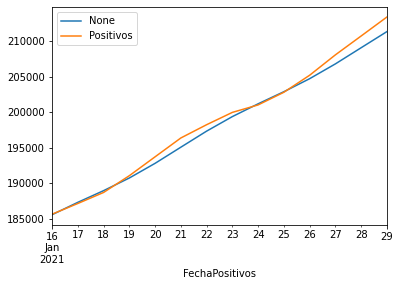

In [ ]:
y_pred.plot(legend=True)
test["Positivos"].plot(legend=True)

####Cálculo de error cuadrático aproximado

In [ ]:
test["Positivos"].mean()

198737.5

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error_p = ((779*100)/1731)-30 #+70% contagioso
error_p = 100-error_p
print("Precisión: {:.2f}".format(error_p), "%")
rms = sqrt(mean_squared_error(y_pred, test["Positivos"]))
rms = rms + rms*(error_p/100)
print("Error medio: {:.2f}".format(rms))

Precisión: 85.00 %
Error medio: 1761.45


####Aplicamos el modelo entrenado

In [ ]:
model2 = ARIMA(df["Positivos"], order=(2,2,3))
model2 = model2.fit()
df.tail()

,Positivos
FechaPositivos,
2021-01-25,202818
2021-01-26,205208
2021-01-27,208074
2021-01-28,210726
2021-01-29,213392


####Futuros positivos

In [ ]:
index_future_dates = pd.date_range(start= '2021-01-29', end= '2021-02-28')
len(index_future_dates)

31

In [ ]:
index_future_dates = pd.date_range(start= '2021-01-29', end= '2021-02-28')
#print(index_future_dates)
y_pred = model2.predict(start=len(df), end= len(df)+30, typ="levels").rename("Positivos")
y_pred.index= index_future_dates

In [ ]:
aux = 0.00
for i in range(0,31):
  aux = y_pred[i]
  y_pred[i] = aux - rms
print(y_pred)

2021-01-29    213636.393270
2021-01-30    215367.081796
2021-01-31    217250.329647
2021-02-01    219597.001828
2021-02-02    222366.662316
2021-02-03    225202.725113
2021-02-04    227707.101349
2021-02-05    229742.856612
2021-02-06    231534.820465
2021-02-07    233494.356731
2021-02-08    235904.788993
2021-02-09    238707.998023
2021-02-10    241552.868318
2021-02-11    244065.489275
2021-02-12    246133.224766
2021-02-13    247986.879912
2021-02-14    250021.168936
2021-02-15    252493.064277
2021-02-16    255328.516486
2021-02-17    258182.858667
2021-02-18    260705.829226
2021-02-19    262807.474520
2021-02-20    264723.113001
2021-02-21    266830.608445
2021-02-22    269361.779092
2021-02-23    272228.313834
2021-02-24    275092.862211
2021-02-25    277628.230261
2021-02-26    279765.575895
2021-02-27    281743.375233
2021-02-28    283922.527361
Freq: D, Name: Positivos, dtype: float64


####Visualizamos la predicción

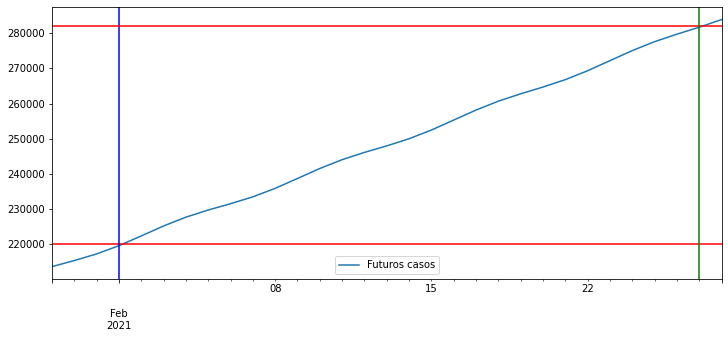

In [ ]:
y_pred.plot(figsize=(12,5), legend=True)
plt.axhline(220000, c='r')
plt.axvline("2021-02-01", c='b')

plt.axhline(282000, c='r') #283500
plt.axvline("2021-02-27", c="g")

#print("Casos positivos para el '20 de Febrero': ", int(y_pred["2021-07-04"]))

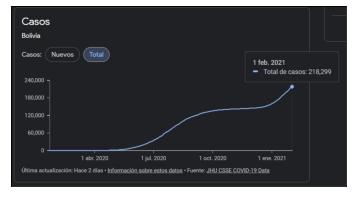

In [ ]:
primero_f = Image.open("1Febrero.jpg")
ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(primero_f)

####Casos por departamento

In [ ]:
T = 283922.527361
print("Casos 28 de Febrero del 2021")
print("SC = {:.2f}".format(T*0.3675))
print("LP = {:.2f}".format(T*0.2615))
print("CBBA = {:.2f}".format(T*0.09352))
print("CH = {:.2f}".format(T*0.0886))
print("OR = {:.2f}".format(T*0.0589))
print("TJ = {:.2f}".format(T*0.0424))
print("PT = {:.2f}".format(T*0.0402))
print("BN = {:.2f}".format(T*0.0383))
print("PN = {:.2f}".format(T*0.0064))


Casos 28 de Febrero del 2021
SC = 104341.53
LP = 74245.74
CBBA = 26552.43
CH = 25155.54
OR = 16723.04
TJ = 12038.32
PT = 11413.69
BN = 10874.23
PN = 1817.10


####Retroalimentamos para Marzo

In [ ]:
copia2 = y_pred.iloc[0:30]
df2 = pd.DataFrame(data=copia2)
df2.reset_index(inplace=True)
df2.rename(columns={"index":"FechaPositivos"}, inplace=True)
df2["FechaPositivos"] = pd.to_datetime(df2["FechaPositivos"])
df2.set_index("FechaPositivos", inplace=True)
df2.head()

,Positivos
FechaPositivos,
2021-01-29,213636.393270
2021-01-30,215367.081796
2021-01-31,217250.329647
2021-02-01,219597.001828
2021-02-02,222366.662316


In [ ]:
type(df2.index)

pandas.core.indexes.datetimes.DatetimeIndex

####Visualizamos los datos

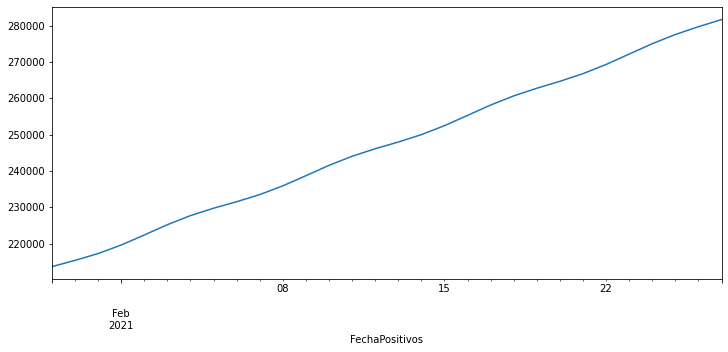

In [ ]:
df2["Positivos"].plot(figsize=(12,5))

####Verificamos la estacionaridad

In [ ]:
def ad_test2(dataset):
  dftest2 = adfuller(dataset, autolag="AIC")
  print("1. ADF: ", dftest2[0])
  print("2. P-Value: ", dftest2[1])
  print("3. Num Lags: ", dftest2[2])
  print("4. Num observaciones para regresión y valores críticos :", dftest2[3])
  print("5. Valores críticos: ")
  for key, val in dftest2[4].items():
    print("\t", key, ": ", val)

In [ ]:
ad_test2(df2["Positivos"])

1. ADF:  0.06331261612126651
2. P-Value:  0.9634651513406032
3. Num Lags:  3
4. Num observaciones para regresión y valores críticos : 26
5. Valores críticos: 
	 1% :  -3.7112123008648155
	 5% :  -2.981246804733728
	 10% :  -2.6300945562130176


In [ ]:
stepwise_fit2 = auto_arima(df2["Positivos"], trace= True, suppress_warnings=True)
stepwise_fit2.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.446, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=430.421, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=430.332, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=535.208, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=434.046, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=458.525, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=536.044, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.090 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -212.166
Date:                Wed, 03 Feb 2021   AIC                            430.332
Time:                        23:24:54   BIC                            434.434
Sample:                             0   HQIC                           431.617
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2364.1685     67.956     34.790      0.000    2230.977    2497.360
ma.L1         -0.0221      0.068     -0.326      0.744      -0.155       0.111
sigma2      1.355e+05   7.05e+04      1.921      0.055   -2733.316    2.74e+05
===================================================================================
Ljung-Box (L1) (Q):                  10.81   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.00   Prob(JB):                         0.30
Heteroskedasticity (H):               0.90   Skew:                             0.03
Prob(H) (two-sided):                  0.88   Kurtosis:                         1.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print("Sin holdout: ", df2.shape)
train2 = df2.iloc[:-9] 
test2 = df2.iloc[-9:]
print("Con holdout: ", train2.shape, test2.shape)

Sin holdout:  (30, 1)
Con holdout:  (21, 1) (9, 1)


####Entrenamos el modelo

In [ ]:
model3 = ARIMA(train2["Positivos"], order=(0,1,1))
model3 = model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Positivos   No. Observations:                   20
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -137.743
Method:                       css-mle   S.D. of innovations            219.667
Date:                Wed, 03 Feb 2021   AIC                            281.486
Time:                        23:29:04   BIC                            284.474
Sample:                    01-30-2021   HQIC                           282.070
                         - 02-18-2021                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2338.8332     95.979     24.368      0.000    2150.717    2526.949
ma.L1.D.Positivos     1.0000      0.123      8.121      0.000       0.759       1.241
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

####Prediciendo en test

In [ ]:
start2 = len(train2)
end2 = len(train2)+len(test2)-1
y_pred2 = model3.predict(start=start2, end=end2, typ="levels")
#y_pred2.index = df2.index[start: end2+1]
print(y_pred2)
print("\n")
print(test2)

2021-02-19    263025.363550
2021-02-20    264932.392267
2021-02-21    266855.835564
2021-02-22    269139.335186
2021-02-23    271908.227972
2021-02-24    274868.991432
2021-02-25    277641.344210
2021-02-26    279948.487399
2021-02-27    281921.874414
Freq: D, dtype: float64


                    Positivos
FechaPositivos               
2021-02-19      262807.474520
2021-02-20      264723.113001
2021-02-21      266830.608445
2021-02-22      269361.779092
2021-02-23      272228.313834
2021-02-24      275092.862211
2021-02-25      277628.230261
2021-02-26      279765.575895
2021-02-27      281743.375233


####Visualizamos la predicción

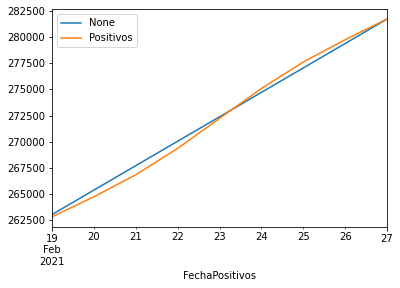

In [ ]:
y_pred2.plot(legend=True)
test2["Positivos"].plot(legend=True)

####Aplicamos el modelo entrenado

In [ ]:
model3 = ARIMA(df2["Positivos"], order=(0,1,1))
model3 = model3.fit()
df2.tail()

,Positivos
FechaPositivos,
2021-02-23,272228.313834
2021-02-24,275092.862211
2021-02-25,277628.230261
2021-02-26,279765.575895
2021-02-27,281743.375233


####Cálculo del error cuadrático medio

In [ ]:
test2["Positivos"].mean()

272242.3702768259

In [ ]:
error_p2 = ((779*100)/1731)-40 #+60% (-10% por tasa de vacunación)
error_p2 = 100-error_p2
print("Precisión: {:.2f}".format(error_p2), "%")
rms2 = sqrt(mean_squared_error(y_pred2, test2["Positivos"]))
rms2 = rms2 + rms2*(error_p2/100)
print("Error medio: {:.2f}".format(rms2))

Precisión: 95.00 %
Error medio: 988.11


####Fechas futuras

In [ ]:
index_future_dates2 = pd.date_range(start= '2021-02-27', end= '2021-03-29')
len(index_future_dates2)

31

In [ ]:
index_future_dates2 = pd.date_range(start= '2021-02-27', end= '2021-03-29')
#print(index_future_dates)
y_pred2 = model3.predict(start=len(df2), end= len(df2)+30, typ="levels").rename("Positivos")
y_pred2.index= index_future_dates2

In [ ]:
aux2 = 0.00
for i in range(0,31):
  aux2 = y_pred2[i]
  y_pred2[i] = aux2 - rms2
print(y_pred2)

2021-02-27    282909.671905
2021-02-28    285242.574636
2021-03-01    287575.477366
2021-03-02    289908.380097
2021-03-03    292241.282827
2021-03-04    294574.185558
2021-03-05    296907.088288
2021-03-06    299239.991019
2021-03-07    301572.893749
2021-03-08    303905.796480
2021-03-09    306238.699211
2021-03-10    308571.601941
2021-03-11    310904.504672
2021-03-12    313237.407402
2021-03-13    315570.310133
2021-03-14    317903.212863
2021-03-15    320236.115594
2021-03-16    322569.018324
2021-03-17    324901.921055
2021-03-18    327234.823785
2021-03-19    329567.726516
2021-03-20    331900.629247
2021-03-21    334233.531977
2021-03-22    336566.434708
2021-03-23    338899.337438
2021-03-24    341232.240169
2021-03-25    343565.142899
2021-03-26    345898.045630
2021-03-27    348230.948360
2021-03-28    350563.851091
2021-03-29    352896.753821
Freq: D, Name: Positivos, dtype: float64


####Visualizamos la predicción

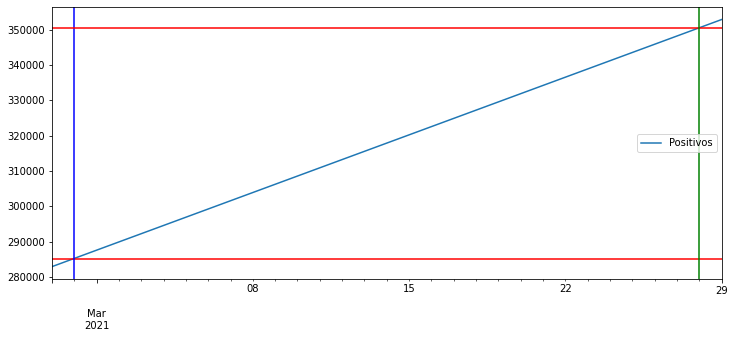

In [ ]:
y_pred2.plot(figsize=(12,5), legend=True)
plt.axhline(285000, c='r')
plt.axvline("2021-02-28", c='b')

plt.axhline(350563, c='r')
plt.axvline("2021-03-28", c="g")